<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-quality-and-Analytic-datamart" data-toc-modified-id="Data-quality-and-Analytic-datamart-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data quality and Analytic datamart</a></span><ul class="toc-item"><li><span><a href="#Set-up" data-toc-modified-id="Set-up-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Set up</a></span></li><li><span><a href="#Loading-Data" data-toc-modified-id="Loading-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Loading Data</a></span></li><li><span><a href="#Quality-of-Data" data-toc-modified-id="Quality-of-Data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Quality of Data</a></span><ul class="toc-item"><li><span><a href="#Quality-of-data-Solar-plant-1" data-toc-modified-id="Quality-of-data-Solar-plant-1-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Quality of data Solar plant 1</a></span></li><li><span><a href="#Quality-of-data-Solar-plant-1---environmental-sensor-data" data-toc-modified-id="Quality-of-data-Solar-plant-1---environmental-sensor-data-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Quality of data Solar plant 1 - environmental sensor data</a></span></li><li><span><a href="#Quality-of-data-Solar-plant-2" data-toc-modified-id="Quality-of-data-Solar-plant-2-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Quality of data Solar plant 2</a></span></li><li><span><a href="#Quality-of-data-Solar-plant-2---enviromental-sensors" data-toc-modified-id="Quality-of-data-Solar-plant-2---enviromental-sensors-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Quality of data Solar plant 2 - enviromental sensors</a></span></li><li><span><a href="#Remaining-data-quality-issues-to-be-further-analyzed" data-toc-modified-id="Remaining-data-quality-issues-to-be-further-analyzed-1.3.5"><span class="toc-item-num">1.3.5&nbsp;&nbsp;</span>Remaining data quality issues to be further analyzed</a></span></li></ul></li><li><span><a href="#CREATION-OF-THE-ANALYTICAL-DATAMART" data-toc-modified-id="CREATION-OF-THE-ANALYTICAL-DATAMART-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>CREATION OF THE ANALYTICAL DATAMART</a></span><ul class="toc-item"><li><span><a href="#Generation-dataset-union" data-toc-modified-id="Generation-dataset-union-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Generation dataset union</a></span></li><li><span><a href="#Union-of-environmental-measurement-datasets" data-toc-modified-id="Union-of-environmental-measurement-datasets-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Union of environmental measurement datasets</a></span></li><li><span><a href="#Creation-of-the-analytical-datamart" data-toc-modified-id="Creation-of-the-analytical-datamart-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Creation of the analytical datamart</a></span></li></ul></li><li><span><a href="#Saving-the-DATAMART" data-toc-modified-id="Saving-the-DATAMART-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Saving the DATAMART</a></span></li></ul></li></ul></div>

# Data quality and Analytic datamart

## Set up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

%config IPCompleter.greedy = True


## Loading Data

This case consists of 4 files:

* Solar plant 1, generation data
* Solar plant 1, environmental sensor data
* Solar plant 2, generation data
* Solar plant 2, environmental sensor data

solar plant 1 - generation

In [2]:
p1g = pd.read_csv('../Datos/Plant_1_Generation_Data.csv')
p1g

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


solar plant 2 - generation

In [3]:
p2g = pd.read_csv('../Datos/Plant_2_Generation_Data.csv')
p2g

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08


solar plant 1 - Sensors

In [4]:
p1w = pd.read_csv('../Datos/Plant_1_Weather_Sensor_Data.csv')
p1w

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


solar plant 2 - Sensors

In [5]:
p2w = pd.read_csv('../Datos/Plant_2_Weather_Sensor_Data.csv')
p2w

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,4136001,iq8k7ZNt4Mwm3w0,23.511703,22.856201,0.0
3255,2020-06-17 23:00:00,4136001,iq8k7ZNt4Mwm3w0,23.482282,22.744190,0.0
3256,2020-06-17 23:15:00,4136001,iq8k7ZNt4Mwm3w0,23.354743,22.492245,0.0
3257,2020-06-17 23:30:00,4136001,iq8k7ZNt4Mwm3w0,23.291048,22.373909,0.0


## Quality of Data

### Quality of data Solar plant 1

We see a general overview

In [6]:
p1g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


There aren't nulls.

The DATA_TIME is of type object.

We transform DATE_TIME to type datatime.

In [7]:
p1g['DATE_TIME'] = pd.to_datetime(p1g['DATE_TIME'], dayfirst = True)

We check

In [8]:
p1g.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


We check that the plant identifier is unique.

In [9]:
p1g['PLANT_ID'].unique()

array([4135001], dtype=int64)

Let's replace it with a more readable literal.

In [10]:
p1g['PLANT_ID'] = p1g['PLANT_ID'].replace(4135001, 'p1')
p1g.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,p1,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15,p1,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15,p1,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15,p1,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15,p1,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


We reviewed the descriptives.

In [11]:
p1g.describe().T

,count,mean,std,min,25%,50%,75%,max
DC_POWER,68778.0,3.147426e+03,4036.457169,0.0,0.000000e+00,4.290000e+02,6.366964e+03,14471.125
AC_POWER,68778.0,3.078028e+02,394.396439,0.0,0.000000e+00,4.149375e+01,6.236187e+02,1410.950
DAILY_YIELD,68778.0,3.295969e+03,3145.178309,0.0,0.000000e+00,2.658714e+03,6.274000e+03,9163.000
TOTAL_YIELD,68778.0,6.978712e+06,416271.982856,6183645.0,6.512003e+06,7.146685e+06,7.268706e+06,7846821.000


We will remove the scientific notation display to facilitate the comparison.

In [12]:
pd.options.display.float_format = '{:15.2f}'.format

In [13]:
p1g.describe().T

,count,mean,std,min,25%,50%,75%,max
DC_POWER,68778.00,3147.43,4036.46,0.00,0.00,429.00,6366.96,14471.12
AC_POWER,68778.00,307.80,394.40,0.00,0.00,41.49,623.62,1410.95
DAILY_YIELD,68778.00,3295.97,3145.18,0.00,0.00,2658.71,6274.00,9163.00
TOTAL_YIELD,68778.00,6978711.76,416271.98,6183645.00,6512002.54,7146685.00,7268705.91,7846821.00


It is strange that there is such a big difference between the averages between the DC power and the power being converted to AC.

Let's visualize it.

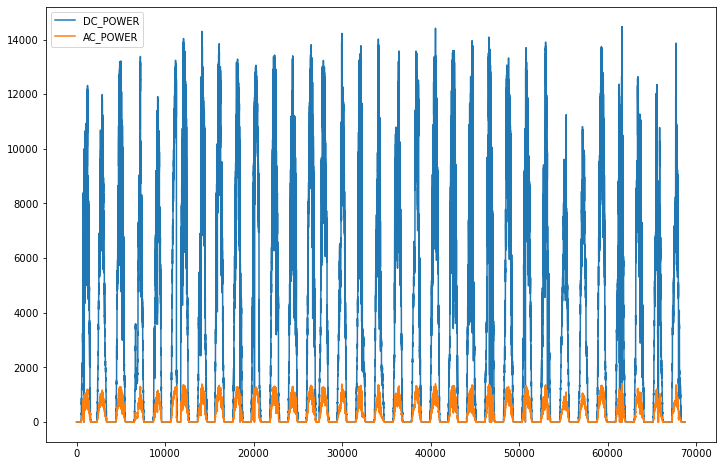

In [14]:
p1g[['DC_POWER', 'AC_POWER']].plot(figsize = (12, 8));

The difference is very large.

First let's check if they are going in the same direction even if on a different scale (with a correlation), and then let's check what is the average ratio between the two measures.

In [15]:
p1g['DC_POWER'].corr(p1g['AC_POWER'])

0.9999962553331404

In [16]:
(p1g['DC_POWER']/ p1g['AC_POWER']).describe()

count          36827.00
mean              10.23
std                0.05
min                9.38
25%               10.20
50%               10.22
75%               10.25
max               10.47
dtype: float64

It seems that the Inverters are transforming only 10% from DC to AC, which a priori is very low.

Anyway from quality we got this far and will continue to explore this in the analysis part and compare it with Plant 2 to see if the same thing happens.

We analyzed the categorical variable, which is the identifier of the inverters.

In [17]:
p1g['SOURCE_KEY'].nunique()

22

In [18]:
p1g['SOURCE_KEY'].value_counts()

bvBOhCH3iADSZry    3155
1BY6WEcLGh8j5v7    3154
7JYdWkrLSPkdwr4    3133
VHMLBKoKgIrUVDU    3133
ZnxXDlPa8U1GXgE    3130
ih0vzX44oOqAx2f    3130
z9Y9gH1T5YWrNuG    3126
wCURE6d3bPkepu2    3126
uHbuxQJl8lW7ozc    3125
pkci93gMrogZuBj    3125
iCRJl6heRkivqQ3    3125
rGa61gmuvPhdLxV    3124
sjndEbLyjtCKgGv    3124
McdE0feGgRqW7Ca    3124
zVJPv84UY57bAof    3124
ZoEaEvLYb1n2sOq    3123
1IF53ai7Xc0U56Y    3119
adLQvlD726eNBSB    3119
zBIq5rxdHJRwDNY    3119
WRmjgnKYAwPKWDb    3118
3PZuoBAID5Wc2HD    3118
YxYtjZvoooNbGkE    3104
Name: SOURCE_KEY, dtype: int64

Conclusions:

    * The solar plant 1 has 22 inverters
    * All of them have a similar number of measurements although not exactly the same
    * They could be shutdowns due to maintenance, or simple data loss, but we note this for the analysis phase.

We are going to analyze the DAILY_YIELD variables, since the metadata tells us that the TOTAL_YIELD variable is the accumulated total **per inverter**, but DAILY_YIELD does not specify it, so we do not know if it is accumulated per inverter or per plant.

The hypothesis is the following: if it is per plant, there should be no difference between the data of the different inverters at the same point in time.

And therefore, if we see that there are differences, then the data is per inverter.

To check this, it is enough to take a sample of inverters.


In [19]:
selection = list(p1g['SOURCE_KEY'].unique()[:5])

In [20]:
temp = p1g[p1g['SOURCE_KEY'].isin(selection)].set_index('DATE_TIME')
temp

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,,,
2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00
2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00
2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00
2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00
2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00
...,...,...,...,...,...,...
2020-06-17 23:45:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,5521.00,6485319.00
2020-06-17 23:45:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,6034.00,6433566.00
2020-06-17 23:45:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,6052.00,7237425.00


In the data we can already see that it is different, but let's check on more data so that it is not an effect of those particular records.

We are going to see it graphically, and for simplicity we are going to take only a sample of days.

In [21]:
temp = temp.loc['2020-06-01':'2020-06-05']
temp

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,,,
2020-06-01 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,829.00,6377931.00
2020-06-01 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6311432.00
2020-06-01 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,7115304.00
2020-06-01 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,730.38,7727821.00
2020-06-01 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7286760.00
...,...,...,...,...,...,...
2020-06-05 23:45:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,7162.00,6412542.00
2020-06-05 23:45:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6348557.00
2020-06-05 23:45:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,7152486.00


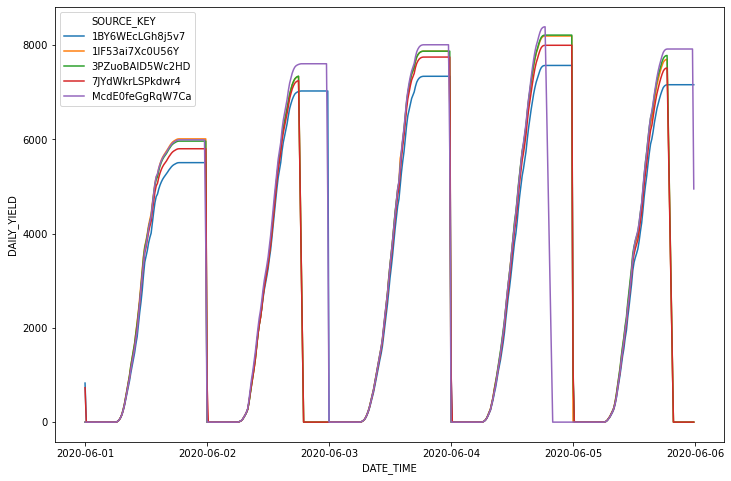

In [22]:
plt.figure(figsize = (12,8))
sns.lineplot(data = temp, x = temp.index, y = temp['DAILY_YIELD'], hue = 'SOURCE_KEY');

Definitely different inverters have different data at the same time point, so we conclude that this variable is **per inverter**.

Finally let's analyze the period in which we have data and if the number of daily measurements is constant.

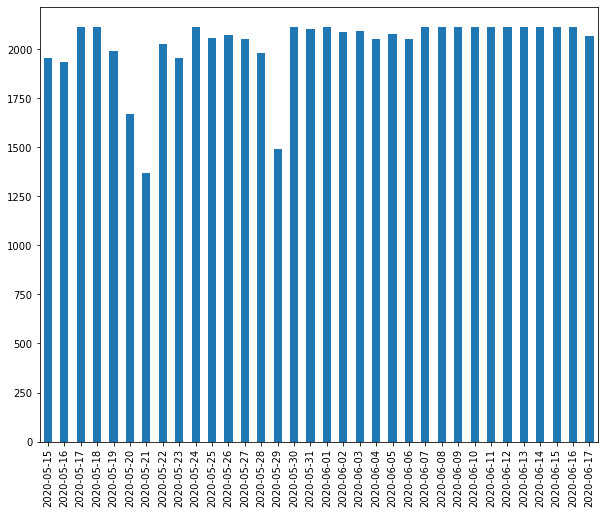

In [23]:
p1g['DATE_TIME'].dt.date.value_counts().sort_index().plot.bar(figsize = (10,8));

Conclusions:

    * The data period is between May 15, 2020 and June 17, 2020.
    * We have data for all days, no missing intermediate days.
    * But some days like 05/21 or 05/29 have less measurements.
    * So it does not seem 100% regular

### Quality of data Solar plant 1 - environmental sensor data

In [24]:
p1w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


We correct the type of DATE_TIME

In [25]:
p1w['DATE_TIME'] = pd.to_datetime(p1w['DATE_TIME'])
p1w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3182 non-null   datetime64[ns]
 1   PLANT_ID             3182 non-null   int64         
 2   SOURCE_KEY           3182 non-null   object        
 3   AMBIENT_TEMPERATURE  3182 non-null   float64       
 4   MODULE_TEMPERATURE   3182 non-null   float64       
 5   IRRADIATION          3182 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 149.3+ KB


In [26]:
p1w.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.18,22.86,0.00
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.08,22.76,0.00
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.94,22.59,0.00
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.85,22.36,0.00
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.62,22.17,0.00


We replace the name of the plant.

In [27]:
p1w['PLANT_ID'] = p1w['PLANT_ID'].replace(4135001, 'p1')
p1w.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,p1,HmiyD2TTLFNqkNe,25.18,22.86,0.00
1,2020-05-15 00:15:00,p1,HmiyD2TTLFNqkNe,25.08,22.76,0.00
2,2020-05-15 00:30:00,p1,HmiyD2TTLFNqkNe,24.94,22.59,0.00
3,2020-05-15 00:45:00,p1,HmiyD2TTLFNqkNe,24.85,22.36,0.00
4,2020-05-15 01:00:00,p1,HmiyD2TTLFNqkNe,24.62,22.17,0.00


We reviewed the statistics.

In [28]:
p1w.describe().T

,count,mean,std,min,25%,50%,75%,max
AMBIENT_TEMPERATURE,3182.00,25.53,3.35,20.40,22.71,24.61,27.92,35.25
MODULE_TEMPERATURE,3182.00,31.09,12.26,18.14,21.09,24.62,41.31,65.55
IRRADIATION,3182.00,0.23,0.30,0.00,0.00,0.02,0.45,1.22


We check the categorical variable, which is the sensor identifier.

In [29]:
p1w['SOURCE_KEY'].nunique()

1

There is only one environmental variable sensor in the plant.

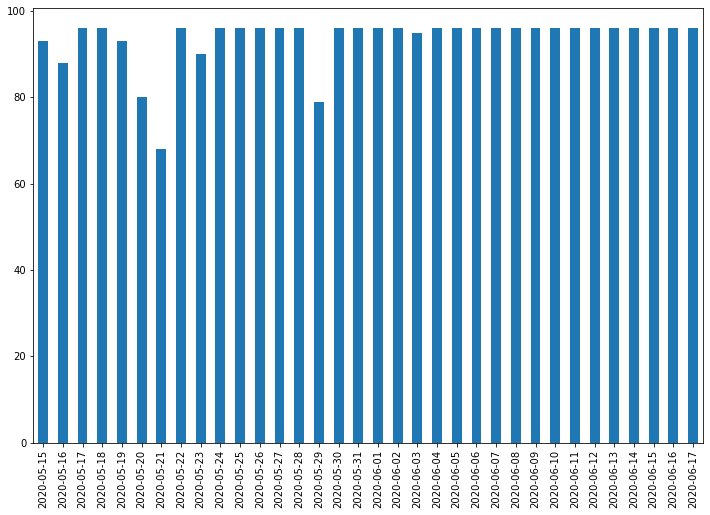

In [30]:
p1w['DATE_TIME'].dt.date.value_counts().sort_index().plot.bar(figsize = (12,8));

Conclusions:

    * The data period is between May 15, 2020 and June 17, 2020.
    * We have data for all days, no missing intermediate days.
    * But some days like 05/21 or 05/29 have less measurements.
    * So it does not seem 100% regular

### Quality of data Solar plant 2

In [31]:
p2g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6   TOTAL_YIELD  67698 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ MB


In [32]:
p2g['DATE_TIME'] = pd.to_datetime(p2g['DATE_TIME'])
p2g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    67698 non-null  datetime64[ns]
 1   PLANT_ID     67698 non-null  int64         
 2   SOURCE_KEY   67698 non-null  object        
 3   DC_POWER     67698 non-null  float64       
 4   AC_POWER     67698 non-null  float64       
 5   DAILY_YIELD  67698 non-null  float64       
 6   TOTAL_YIELD  67698 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.6+ MB


In [33]:
p2g.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,4136001,4UPUqMRk7TRMgml,0.00,0.00,9425.00,2429011.00
1,2020-05-15,4136001,81aHJ1q11NBPMrL,0.00,0.00,0.00,1215278736.00
2,2020-05-15,4136001,9kRcWv60rDACzjR,0.00,0.00,3075.33,2247719577.00
3,2020-05-15,4136001,Et9kgGMDl729KT4,0.00,0.00,269.93,1704250.00
4,2020-05-15,4136001,IQ2d7wF4YD8zU1Q,0.00,0.00,3177.00,19941526.00


In [34]:
p2g['PLANT_ID'] = p2g['PLANT_ID'].replace(4136001, 'p2')
p2g.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,p2,4UPUqMRk7TRMgml,0.00,0.00,9425.00,2429011.00
1,2020-05-15,p2,81aHJ1q11NBPMrL,0.00,0.00,0.00,1215278736.00
2,2020-05-15,p2,9kRcWv60rDACzjR,0.00,0.00,3075.33,2247719577.00
3,2020-05-15,p2,Et9kgGMDl729KT4,0.00,0.00,269.93,1704250.00
4,2020-05-15,p2,IQ2d7wF4YD8zU1Q,0.00,0.00,3177.00,19941526.00


In [35]:
p2g.describe().T

,count,mean,std,min,25%,50%,75%,max
DC_POWER,67698.00,246.70,370.57,0.00,0.00,0.00,446.59,1420.93
AC_POWER,67698.00,241.28,362.11,0.00,0.00,0.00,438.22,1385.42
DAILY_YIELD,67698.00,3294.89,2919.45,0.00,272.75,2911.00,5534.00,9873.00
TOTAL_YIELD,67698.00,658944788.42,729667771.07,0.00,19964944.87,282627587.00,1348495113.00,2247916295.00


In [36]:
(p2g['DC_POWER']/ p2g['AC_POWER']).describe()

count          32036.00
mean               1.02
std                0.01
min                0.99
25%                1.02
50%                1.02
75%                1.03
max                1.10
dtype: float64

In this solar plant the ratio values are very close to one. Theoretically it would be more efficient.

We analyze the categorical variable, which is the identifier of the inverters.

In [37]:
p2g['SOURCE_KEY'].nunique()

22

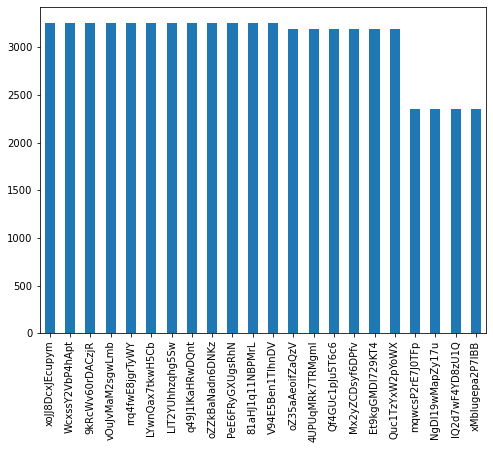

In [38]:
p2g['SOURCE_KEY'].value_counts().plot.bar(figsize = (8,6));

Conclusions:

    * Plant 2 has 22 inverters
    * All of them have a similar number of sizes, although not exactly the same.
    * With the exception of 4 which have about 800 fewer measurements.
    * We note this for the analysis phase

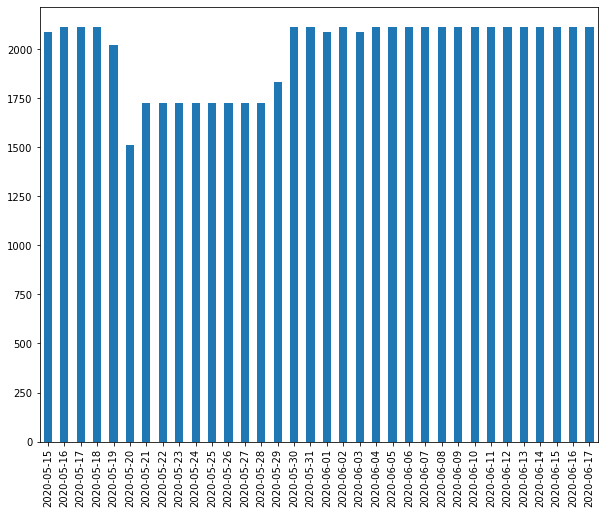

In [39]:
p2g['DATE_TIME'].dt.date.value_counts().sort_index().plot.bar(figsize = (10,8));

Conclusions:

    * The data period is between May 15, 2020 and June 17, 2020.
    * We have data for all days, no missing intermediate days.
    * But some days like 05/20 and several others have less measurements.
    * So it does not seem 100% regular

### Quality of data Solar plant 2 - enviromental sensors

In [40]:
p2w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   PLANT_ID             3259 non-null   int64  
 2   SOURCE_KEY           3259 non-null   object 
 3   AMBIENT_TEMPERATURE  3259 non-null   float64
 4   MODULE_TEMPERATURE   3259 non-null   float64
 5   IRRADIATION          3259 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 152.9+ KB


In [41]:
p2w['DATE_TIME'] = pd.to_datetime(p2w['DATE_TIME'])

In [42]:
p2w.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.00,25.06,0.00
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.88,24.42,0.00
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.68,24.43,0.00
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.50,24.42,0.00
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.60,25.09,0.00


In [43]:
p2w['PLANT_ID'] = p2w['PLANT_ID'].replace(4136001 ,'p2')
p2w.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,p2,iq8k7ZNt4Mwm3w0,27.00,25.06,0.00
1,2020-05-15 00:15:00,p2,iq8k7ZNt4Mwm3w0,26.88,24.42,0.00
2,2020-05-15 00:30:00,p2,iq8k7ZNt4Mwm3w0,26.68,24.43,0.00
3,2020-05-15 00:45:00,p2,iq8k7ZNt4Mwm3w0,26.50,24.42,0.00
4,2020-05-15 01:00:00,p2,iq8k7ZNt4Mwm3w0,26.60,25.09,0.00


In [44]:
p2w.describe().T

,count,mean,std,min,25%,50%,75%,max
AMBIENT_TEMPERATURE,3259.00,28.07,4.06,20.94,24.60,26.98,31.06,39.18
MODULE_TEMPERATURE,3259.00,32.77,11.34,20.27,23.72,27.53,40.48,66.64
IRRADIATION,3259.00,0.23,0.31,0.00,0.00,0.02,0.44,1.10


In [45]:
p2w['SOURCE_KEY'].nunique()

1

In [46]:
p2w

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,p2,iq8k7ZNt4Mwm3w0,27.00,25.06,0.00
1,2020-05-15 00:15:00,p2,iq8k7ZNt4Mwm3w0,26.88,24.42,0.00
2,2020-05-15 00:30:00,p2,iq8k7ZNt4Mwm3w0,26.68,24.43,0.00
3,2020-05-15 00:45:00,p2,iq8k7ZNt4Mwm3w0,26.50,24.42,0.00
4,2020-05-15 01:00:00,p2,iq8k7ZNt4Mwm3w0,26.60,25.09,0.00
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,p2,iq8k7ZNt4Mwm3w0,23.51,22.86,0.00
3255,2020-06-17 23:00:00,p2,iq8k7ZNt4Mwm3w0,23.48,22.74,0.00
3256,2020-06-17 23:15:00,p2,iq8k7ZNt4Mwm3w0,23.35,22.49,0.00
3257,2020-06-17 23:30:00,p2,iq8k7ZNt4Mwm3w0,23.29,22.37,0.00


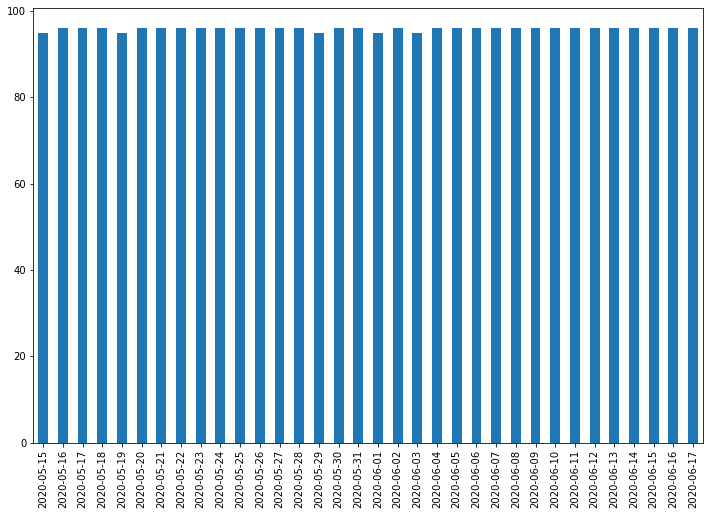

In [47]:
p2w['DATE_TIME'].dt.date.value_counts().sort_index().plot.bar(figsize = (12,8));

Conclusions:

    * The data period is between May 15, 2020 and June 17, 2020.
    * We have data for all days, no missing in between
    * But some days like 05/15 or others have less measurements, although there are much less missing than in the other datasets.
    * But it does not seem 100% regular

### Remaining data quality issues to be further analyzed

* In Solar plant 1 it seems that the Inverters are transforming only 10% of DC to AC, which a priori is very low.
* In Solar plant 2 the ratio is much closer to 1.
* The measurement intervals are not 100% regular. There are days with less measurements, and there are also differences per inverter.

## CREATION OF THE ANALYTICAL DATAMART

We are going to make a piecewise union.

First the two generation datasets. That will be a stacking of records since the fields are the same.

Then the two environmental measurement datasets. Which will be a stacking of records since the fields are the same.

And finally we will cross both partials by means of the integration by key fields.

### Generation dataset union

In [48]:
generation = pd.concat([p1g, p2g], axis = 0)

In [49]:
generation.head(5)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00
1,2020-05-15,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00
2,2020-05-15,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00
3,2020-05-15,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00
4,2020-05-15,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00


We will now rename the variables to make them more descriptive and usable.

In [50]:
generation.columns = ['date', 'plant', 'inverter_id', 'kw_dc','kw_ac', 'kw_day', 'kw_total']

In [51]:
generation.head()

,date,plant,inverter_id,kw_dc,kw_ac,kw_day,kw_total
0,2020-05-15,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00
1,2020-05-15,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00
2,2020-05-15,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00
3,2020-05-15,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00
4,2020-05-15,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00


Now that we have the 2 plants joined we are going to do what is called a consistency analysis, since according to the documentation kw_day and kw_total are directly related to kw_dc and kw_ac.

Let's try to replicate the data of kw_day and kw_total.

In [52]:
gener2 = generation.copy()

We create a new variable called 'day' to be able to aggregate for it.

In [53]:
gener2['day'] = gener2['date'].dt.date
gener2.tail()

,date,plant,inverter_id,kw_dc,kw_ac,kw_day,kw_total,day
67693,2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00,2020-06-17
67694,2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00,2020-06-17
67695,2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00,2020-06-17
67696,2020-06-17 23:45:00,p2,xMbIugepa2P7lBB,0.00,0.00,4218.00,106896394.00,2020-06-17
67697,2020-06-17 23:45:00,p2,xoJJ8DcxJEcupym,0.00,0.00,4316.00,209335741.00,2020-06-17


The sum per plant, date and inverter of kw_dc or kw_ac should coincide with the maximum kw_dia.

In [54]:
gener2 = gener2.groupby(['plant', 'day', 'inverter_id']).agg({'kw_dc': sum, 'kw_ac': sum, 'kw_day': max, 'kw_total':max}) \
    .reset_index()

We sort in order to analyze

In [55]:
gener2 = gener2.sort_values(['plant','inverter_id', 'day'])

In [56]:
gener2

,plant,day,inverter_id,kw_dc,kw_ac,kw_day,kw_total
0,p1,2020-05-15,1BY6WEcLGh8j5v7,235340.70,23046.55,5754.00,6265313.00
22,p1,2020-05-16,1BY6WEcLGh8j5v7,256629.88,25124.49,6292.00,6271605.00
44,p1,2020-05-17,1BY6WEcLGh8j5v7,288039.82,28172.85,7045.00,6278650.00
66,p1,2020-05-18,1BY6WEcLGh8j5v7,204030.30,19970.51,4998.00,6283648.00
88,p1,2020-05-19,1BY6WEcLGh8j5v7,232277.27,22741.18,6449.00,6290097.00
...,...,...,...,...,...,...,...
1375,p2,2020-06-13,xoJJ8DcxJEcupym,27443.74,26840.58,6632.00,209312200.00
1397,p2,2020-06-14,xoJJ8DcxJEcupym,30768.78,30088.97,7268.00,209319687.00
1419,p2,2020-06-15,xoJJ8DcxJEcupym,25597.24,25049.49,7412.67,209325949.00
1441,p2,2020-06-16,xoJJ8DcxJEcupym,22335.69,21870.63,6203.20,209331425.00


Kw_day does not agree at all with either kw_dc or kw_ac.

Let's see if it agrees with kw_total, for this we calculate the daily increment of kw_total which should match the maximum of kw_day of the previous day.

In [57]:
gener2['lag1'] = gener2.groupby(['plant','inverter_id'])['kw_total'].shift(1)
gener2['increase'] = gener2['kw_total'] - gener2['lag1']
gener2

,plant,day,inverter_id,kw_dc,kw_ac,kw_day,kw_total,lag1,increase
0,p1,2020-05-15,1BY6WEcLGh8j5v7,235340.70,23046.55,5754.00,6265313.00,NaN,NaN
22,p1,2020-05-16,1BY6WEcLGh8j5v7,256629.88,25124.49,6292.00,6271605.00,6265313.00,6292.00
44,p1,2020-05-17,1BY6WEcLGh8j5v7,288039.82,28172.85,7045.00,6278650.00,6271605.00,7045.00
66,p1,2020-05-18,1BY6WEcLGh8j5v7,204030.30,19970.51,4998.00,6283648.00,6278650.00,4998.00
88,p1,2020-05-19,1BY6WEcLGh8j5v7,232277.27,22741.18,6449.00,6290097.00,6283648.00,6449.00
...,...,...,...,...,...,...,...,...,...
1375,p2,2020-06-13,xoJJ8DcxJEcupym,27443.74,26840.58,6632.00,209312200.00,209305520.00,6680.00
1397,p2,2020-06-14,xoJJ8DcxJEcupym,30768.78,30088.97,7268.00,209319687.00,209312200.00,7487.00
1419,p2,2020-06-15,xoJJ8DcxJEcupym,25597.24,25049.49,7412.67,209325949.00,209319687.00,6262.00
1441,p2,2020-06-16,xoJJ8DcxJEcupym,22335.69,21870.63,6203.20,209331425.00,209325949.00,5476.00


We checked on solar plant 1.

In [58]:
gener2[gener2['plant'] == 'p1'].head(50)

,plant,day,inverter_id,kw_dc,kw_ac,kw_day,kw_total,lag1,increase
0,p1,2020-05-15,1BY6WEcLGh8j5v7,235340.70,23046.55,5754.00,6265313.00,NaN,NaN
22,p1,2020-05-16,1BY6WEcLGh8j5v7,256629.88,25124.49,6292.00,6271605.00,6265313.00,6292.00
44,p1,2020-05-17,1BY6WEcLGh8j5v7,288039.82,28172.85,7045.00,6278650.00,6271605.00,7045.00
66,p1,2020-05-18,1BY6WEcLGh8j5v7,204030.30,19970.51,4998.00,6283648.00,6278650.00,4998.00
88,p1,2020-05-19,1BY6WEcLGh8j5v7,232277.27,22741.18,6449.00,6290097.00,6283648.00,6449.00
110,p1,2020-05-20,1BY6WEcLGh8j5v7,230412.62,22516.26,8249.00,6298346.00,6290097.00,8249.00
132,p1,2020-05-21,1BY6WEcLGh8j5v7,288676.60,28223.13,7243.00,6305589.00,6298346.00,7243.00
154,p1,2020-05-22,1BY6WEcLGh8j5v7,280809.07,27456.63,6848.00,6312437.00,6305589.00,6848.00
176,p1,2020-05-23,1BY6WEcLGh8j5v7,326468.27,31922.93,7966.00,6320403.00,6312437.00,7966.00
198,p1,2020-05-24,1BY6WEcLGh8j5v7,309111.73,30220.37,7537.00,6327940.00,6320403.00,7537.00


We checked on solar plant 2.

In [62]:
gener2[gener2['plant'] == 'p2'].head(50)

,plant,day,inverter_id,kw_dc,kw_ac,kw_day,kw_total,lag1,increase
748,p2,2020-05-15,4UPUqMRk7TRMgml,17112.65,16744.08,9425.00,2433212.00,NaN,NaN
770,p2,2020-05-16,4UPUqMRk7TRMgml,23305.45,22791.22,5677.00,2438889.00,2433212.00,5677.00
792,p2,2020-05-17,4UPUqMRk7TRMgml,25985.95,25430.42,6342.00,2445231.00,2438889.00,6342.00
814,p2,2020-05-18,4UPUqMRk7TRMgml,31218.58,30516.03,7641.00,2452872.00,2445231.00,7641.00
836,p2,2020-05-19,4UPUqMRk7TRMgml,8040.00,7878.39,7641.00,2454841.00,2452872.00,1969.00
858,p2,2020-05-20,4UPUqMRk7TRMgml,9852.13,9641.35,9423.00,2464264.00,2454841.00,9423.00
880,p2,2020-05-21,4UPUqMRk7TRMgml,37403.77,36540.63,9423.00,2473415.00,2464264.00,9151.00
898,p2,2020-05-22,4UPUqMRk7TRMgml,40414.35,39472.14,9863.00,2483278.00,2473415.00,9863.00
916,p2,2020-05-23,4UPUqMRk7TRMgml,39690.66,38769.69,9863.00,2492966.00,2483278.00,9688.00
934,p2,2020-05-24,4UPUqMRk7TRMgml,18963.72,18558.18,9688.00,2497601.00,2492966.00,4635.00


Conclusions:
* kw_dia has consistency with kw_total
* but they are not consistent with kw_dc or kw_ac
* it is as if they were in different units or there is some calculation that we are not aware of.
* therefore we will have 2 blocks to use: either kw_dc with kw_ac, or kw_dia with kw_total, but we cannot mix them with each other.

### Union of environmental measurement datasets

In [65]:
temper = pd.concat([p1w,p2w], axis = 0)
temper

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,p1,HmiyD2TTLFNqkNe,25.18,22.86,0.00
1,2020-05-15 00:15:00,p1,HmiyD2TTLFNqkNe,25.08,22.76,0.00
2,2020-05-15 00:30:00,p1,HmiyD2TTLFNqkNe,24.94,22.59,0.00
3,2020-05-15 00:45:00,p1,HmiyD2TTLFNqkNe,24.85,22.36,0.00
4,2020-05-15 01:00:00,p1,HmiyD2TTLFNqkNe,24.62,22.17,0.00
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,p2,iq8k7ZNt4Mwm3w0,23.51,22.86,0.00
3255,2020-06-17 23:00:00,p2,iq8k7ZNt4Mwm3w0,23.48,22.74,0.00
3256,2020-06-17 23:15:00,p2,iq8k7ZNt4Mwm3w0,23.35,22.49,0.00
3257,2020-06-17 23:30:00,p2,iq8k7ZNt4Mwm3w0,23.29,22.37,0.00


We will now rename the variables to make them more descriptive and usable.

In [66]:
temper.columns = ['date','plant','sensor_id','t_environment','t_module','irradiation']
temper

,date,plant,sensor_id,t_environment,t_module,irradiation
0,2020-05-15 00:00:00,p1,HmiyD2TTLFNqkNe,25.18,22.86,0.00
1,2020-05-15 00:15:00,p1,HmiyD2TTLFNqkNe,25.08,22.76,0.00
2,2020-05-15 00:30:00,p1,HmiyD2TTLFNqkNe,24.94,22.59,0.00
3,2020-05-15 00:45:00,p1,HmiyD2TTLFNqkNe,24.85,22.36,0.00
4,2020-05-15 01:00:00,p1,HmiyD2TTLFNqkNe,24.62,22.17,0.00
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,p2,iq8k7ZNt4Mwm3w0,23.51,22.86,0.00
3255,2020-06-17 23:00:00,p2,iq8k7ZNt4Mwm3w0,23.48,22.74,0.00
3256,2020-06-17 23:15:00,p2,iq8k7ZNt4Mwm3w0,23.35,22.49,0.00
3257,2020-06-17 23:30:00,p2,iq8k7ZNt4Mwm3w0,23.29,22.37,0.00


### Creation of the analytical datamart

In this case the key field is composed of date and plant and sends the generation dataset, since the temperature field only provides additional variables.

In [68]:
df = pd.merge(left = generation, right = temper, how = 'left', on = ['date', 'plant'] )
df

,date,plant,inverter_id,kw_dc,kw_ac,kw_day,kw_total,sensor_id,t_environment,t_module,irradiation
0,2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
1,2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2,2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
3,2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
4,2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
...,...,...,...,...,...,...,...,...,...,...,...
136471,2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
136472,2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
136473,2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
136474,2020-06-17 23:45:00,p2,xMbIugepa2P7lBB,0.00,0.00,4218.00,106896394.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00


After an integration it is always advisable to check whether nulls have been generated.

In [72]:
df.isna().sum()

date             0
plant            0
inverter_id      0
kw_dc            0
kw_ac            0
kw_day           0
kw_total         0
sensor_id        4
t_environment    4
t_module         4
irradiation      4
dtype: int64

We look for whether the nulls meet any pattern.

In [74]:
df[df['sensor_id'].isna()]

,date,plant,inverter_id,kw_dc,kw_ac,kw_day,kw_total,sensor_id,t_environment,t_module,irradiation
38544,2020-06-03 14:00:00,p1,1IF53ai7Xc0U56Y,7003.00,685.80,5601.00,6330385.00,NaN,NaN,NaN,NaN
38545,2020-06-03 14:00:00,p1,adLQvlD726eNBSB,7204.00,705.40,5685.00,6419961.00,NaN,NaN,NaN,NaN
38546,2020-06-03 14:00:00,p1,wCURE6d3bPkepu2,7545.00,738.70,5579.00,6928448.00,NaN,NaN,NaN,NaN
38547,2020-06-03 14:00:00,p1,z9Y9gH1T5YWrNuG,7946.00,777.80,5541.00,7152815.00,NaN,NaN,NaN,NaN


It is June 3rd at 14:00, which for some reason has no temperature data but only for 4 inverters on floor 1.

Let's look in the temperature dataset to see if that datetime exists.

In [76]:
temper[temper['date'].between('2020-06-03 13:30:00', '2020-06-03 14:30:00')]

,date,plant,sensor_id,t_environment,t_module,irradiation
1797,2020-06-03 13:30:00,p1,HmiyD2TTLFNqkNe,28.56,48.78,0.75
1798,2020-06-03 13:45:00,p1,HmiyD2TTLFNqkNe,27.86,46.63,0.62
1799,2020-06-03 14:15:00,p1,HmiyD2TTLFNqkNe,28.36,50.63,0.72
1800,2020-06-03 14:30:00,p1,HmiyD2TTLFNqkNe,28.31,47.38,0.67
1874,2020-06-03 13:30:00,p2,iq8k7ZNt4Mwm3w0,28.60,37.68,0.41
1875,2020-06-03 13:45:00,p2,iq8k7ZNt4Mwm3w0,28.75,36.35,0.35
1876,2020-06-03 14:15:00,p2,iq8k7ZNt4Mwm3w0,30.45,45.63,0.76
1877,2020-06-03 14:30:00,p2,iq8k7ZNt4Mwm3w0,29.64,40.40,0.44


Indeed, we see that this section is missing on both solar plants. However, there are only measurements at that time on plant 1, and only on 4 inverters.

Therefore there would be two solutions:

* impute those data for those inverters.
* delete these 4 records

Given that it seems to be a measurement range of only 4 inverters on plant 1, we will choose to delete them.

In [77]:
df.dropna(inplace = True)
df

,date,plant,inverter_id,kw_dc,kw_ac,kw_day,kw_total,sensor_id,t_environment,t_module,irradiation
0,2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
1,2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2,2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
3,2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
4,2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
...,...,...,...,...,...,...,...,...,...,...,...
136471,2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
136472,2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
136473,2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
136474,2020-06-17 23:45:00,p2,xMbIugepa2P7lBB,0.00,0.00,4218.00,106896394.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00


In [78]:
df.set_index('date', inplace = True)

## Saving the DATAMART

In [79]:
df

,plant,inverter_id,kw_dc,kw_ac,kw_day,kw_total,sensor_id,t_environment,t_module,irradiation
date,,,,,,,,,,
2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.00,0.00,0.00,6259559.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.00,0.00,0.00,6183645.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.00,0.00,0.00,6987759.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.00,0.00,0.00,7602960.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.00,0.00,0.00,7158964.00,HmiyD2TTLFNqkNe,25.18,22.86,0.00
...,...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.00,0.00,4157.00,520758.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.00,0.00,3931.00,121131356.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00
2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.00,0.00,4322.00,2427691.00,iq8k7ZNt4Mwm3w0,23.20,22.54,0.00


In [83]:
df.to_pickle('../Datos/df.pickle')